<a href="https://colab.research.google.com/github/yasinfahmy/Real-Estate-Price-Prediction/blob/main/Real_Estate_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing and Reading Data

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set()

import sklearn.model_selection as model_selection
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline 
from sklearn.compose import make_column_transformer
from sklearn.impute import KNNImputer 
from sklearn.feature_selection import SelectKBest, chi2 #limits number of features
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder #bin numerical variables
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 81)

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/Elnisa/nisa/main/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Elnisa/nisa/main/test.csv')

# Data Exploration

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Data Types
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [ ]:
# Checking for missing values
missing_count = train.isna().sum()/len(train)*100
missing_count = missing_count[missing_count > 0]
missing_count.sort_values()

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

In [ ]:
# Numerical variables distribution
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
num_vars = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'SalePrice']
num_vars_matrix = train.loc[:, num_vars].iloc[1:]
num_vars_matrix.corr().style.background_gradient(cmap="Blues")

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
OverallQual,1.000000,0.592956,0.600639,0.561970,0.538131,0.476750,0.550445,0.427229,0.572153,0.550517,0.790974
GrLivArea,0.592956,1.000000,0.467206,0.468950,0.455039,0.566374,0.629975,0.825532,0.198828,0.287255,0.708599
GarageCars,0.600639,0.467206,1.000000,0.882467,0.434729,0.439596,0.469619,0.362209,0.537847,0.420560,0.640383
GarageArea,0.561970,0.468950,0.882467,1.000000,0.486832,0.490099,0.405570,0.337713,0.478903,0.371502,0.623400
TotalBsmtSF,0.538131,0.455039,0.434729,0.486832,1.000000,0.819516,0.324064,0.285962,0.391960,0.291440,0.613760
1stFlrSF,0.476750,0.566374,0.439596,0.490099,0.819516,1.000000,0.381231,0.410218,0.282725,0.240973,0.606197
FullBath,0.550445,0.629975,0.469619,0.405570,0.324064,0.381231,1.000000,0.554567,0.467979,0.438781,0.560619
TotRmsAbvGrd,0.427229,0.825532,0.362209,0.337713,0.285962,0.410218,0.554567,1.000000,0.094995,0.191296,0.533680
YearBuilt,0.572153,0.198828,0.537847,0.478903,0.391960,0.282725,0.467979,0.094995,1.000000,0.592603,0.522867
YearRemodAdd,0.550517,0.287255,0.420560,0.371502,0.291440,0.240973,0.438781,0.191296,0.592603,1.000000,0.507047


# Data Wrangling

## Handling Missing Value

### Imputing missing numerical values


In [ ]:
# Checking for missing numerical values
missing_count_num = train.select_dtypes(exclude='object').isna().sum()/len(train)*100
missing_count_num = missing_count_num[missing_count_num > 0]
missing_count_num.sort_values()

MasVnrArea      0.547945
GarageYrBlt     5.547945
LotFrontage    17.739726
dtype: float64

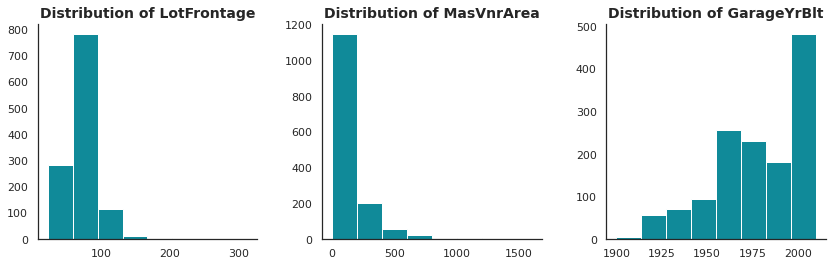

In [ ]:
fig = plt.figure(figsize = (12, 4)) # determine the size of the figure for three sub plots

for idx,col in enumerate(missing_count_num.index):
  sns.set_style("white") # override the default matplotlib style, to avoid the grey background and grid
  plt.subplot(1,3,1+idx);
  plt.hist(train[col], # the variable on which to create the histogram
          bins = 8, # create a histogram with 8 bins
          color = "#108A99")
  plt.title("Distribution of "+col, fontsize = 14, weight = "bold")
  sns.despine() # removes the top and right border of our graph

fig.tight_layout(pad=1.5)
plt.show();

In [ ]:
train['LotFrontage'] = train['LotFrontage'].fillna(abs(train['LotFrontage'].median()))
train['MasVnrArea'] = train['MasVnrArea'].fillna(abs(train['MasVnrArea'].median()))
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mode()[0])
train.select_dtypes(exclude='object').isna().sum().sum() # number of nan values of numerical variables in train data set

0

### Correctly impute missing categorical data

In [ ]:
#Checking for missing categorical values
missing_count_cat = train.select_dtypes(include='object').isna().sum()/len(train)*100
missing_count_cat = missing_count_cat[missing_count_cat > 0]
missing_count_cat.sort_values()

Electrical       0.068493
MasVnrType       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

In [ ]:
# Impute categorical nan values
train['PoolQC'] = train['PoolQC'].fillna('No Pool')
train['MiscFeature'] = train['MiscFeature'].fillna('No miscellaneous features')
train['Alley'] = train['Alley'].fillna('No alley access')
train['Fence'] = train['Fence'].fillna('No fence')
train['FireplaceQu'] = train['FireplaceQu'].fillna('No fireplace')

train['GarageCond'] = train['GarageCond'].fillna('No garage')
train['GarageQual'] = train['GarageQual'].fillna('No garage')
train['GarageFinish'] = train['GarageFinish'].fillna('No garage')
train['GarageType'] = train['GarageType'].fillna('No garage')

train['BsmtFinType2'] = train['BsmtFinType2'].fillna('No basement')
train['BsmtExposure'] = train['BsmtExposure'].fillna('No basement')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('No basement')
train['BsmtCond'] = train['BsmtCond'].fillna('No basement')
train['BsmtQual'] = train['BsmtQual'].fillna('No basement')

train['MasVnrType'] = train['MasVnrType'].fillna('None')
train['Electrical'] = train['Electrical'].fillna('No information')

train.select_dtypes(include='object').isna().sum().sum()

0

## Exploring the PDFs of numerical variables

### No outliers

**BsmtUnfSF**

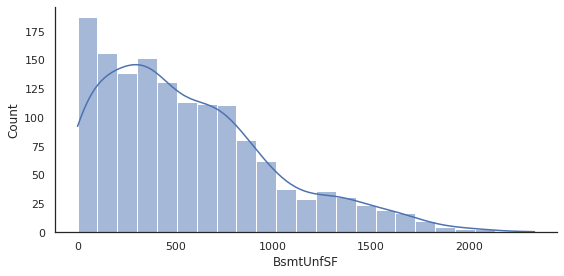

In [ ]:
sns.displot(data=train['BsmtUnfSF'], kde=True, height=4, aspect=2)

**BsmtFullBath**

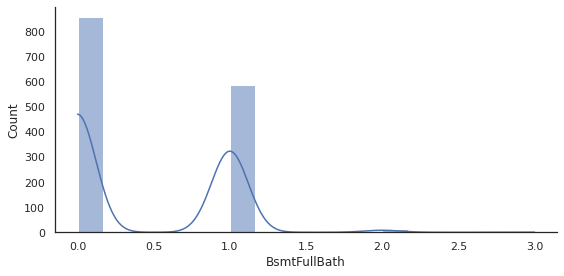

In [ ]:
sns.displot(data=train['BsmtFullBath'], kde=True, height=4, aspect=2)

**BsmtHalfBath**

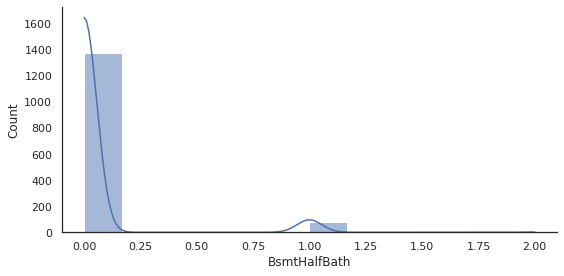

In [ ]:
sns.displot(data=train['BsmtHalfBath'], kde=True, height=4, aspect=2)

**FullBath**

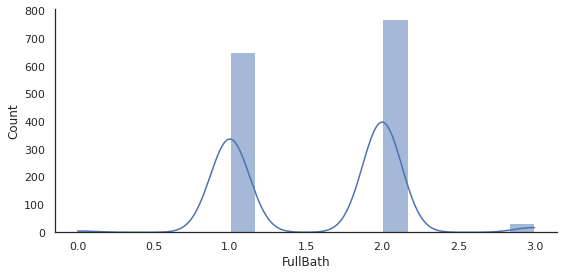

In [ ]:
sns.displot(data=train['FullBath'], kde=True, height=4, aspect=2)

**HalfBath**

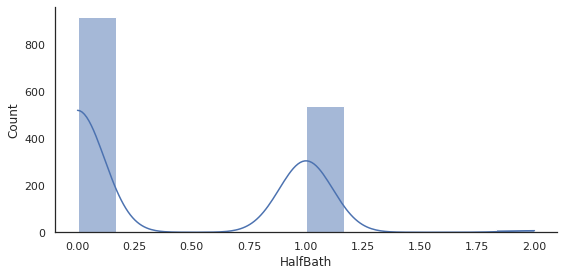

In [ ]:
sns.displot(data=train['HalfBath'], kde=True, height=4, aspect=2)

**BedroomAbvGr**

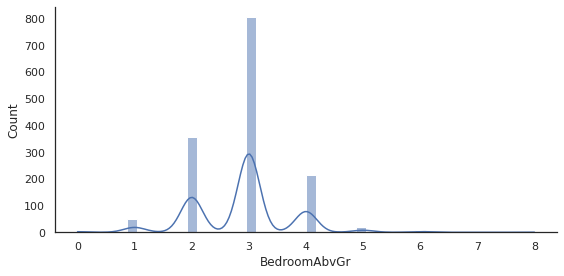

In [ ]:
sns.displot(data=train['BedroomAbvGr'], kde=True, height=4, aspect=2)

**KitchenAbvGr**

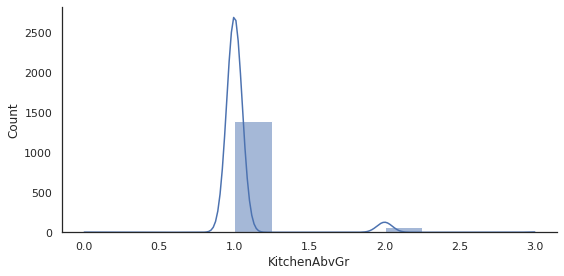

In [ ]:
sns.displot(data=train['KitchenAbvGr'], kde=True, height=4, aspect=2)

**TotRmsAbvGrd**

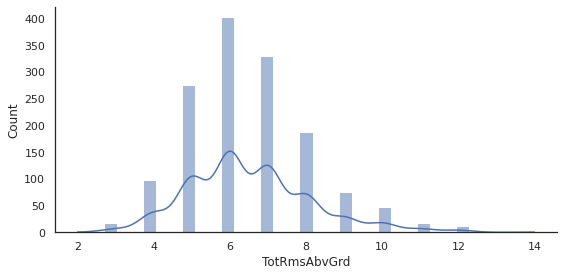

In [ ]:
sns.displot(data=train['TotRmsAbvGrd'], kde=True, height=4, aspect=2)

**Fireplaces**

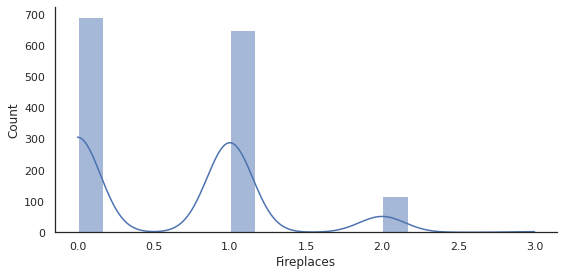

In [ ]:
sns.displot(data=train['Fireplaces'], kde=True, height=4, aspect=2)

**GarageCars**

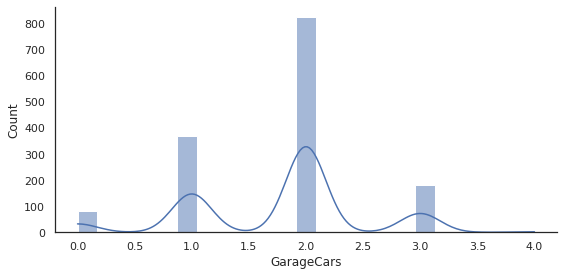

In [ ]:
sns.displot(data=train['GarageCars'], kde=True, height=4, aspect=2)

### Remove outliers

**SalePrice**

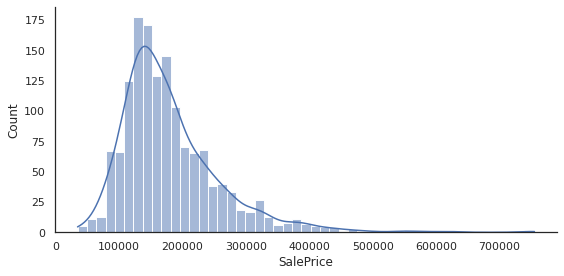

In [ ]:
sns.displot(data=train['SalePrice'], kde=True, height=4, aspect=2)

In [ ]:
# Dropping top 0.5%
q = train['SalePrice'].quantile(0.995)
print('Cut-Off at: '+str(q))

Cut-Off at: 527331.9149999974


In [ ]:
ds = train['SalePrice']>q
print('Rows deleted: '+str(ds.sum()))
train = train[train['SalePrice']<q]

Rows deleted: 8


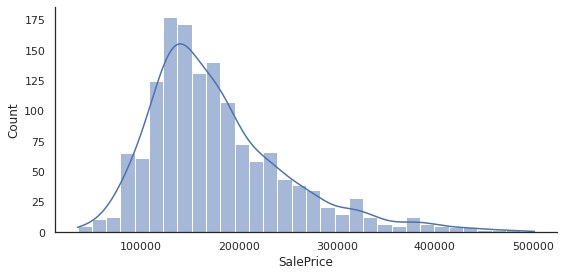

In [ ]:
# PDF of SalePrice
# It will make it easy to spot outliers 
sns.displot(data=train['SalePrice'], kde=True, height=4, aspect=2)

**LotFrontage**

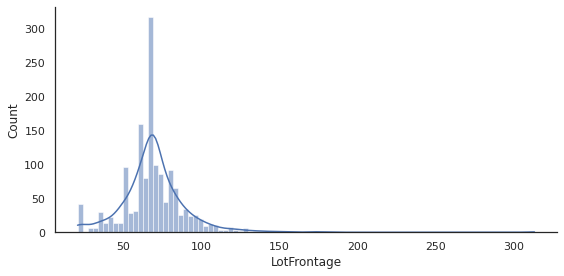

In [ ]:
sns.displot(data=train['LotFrontage'], kde=True, height=4, aspect=2)

In [ ]:
q = train['LotFrontage'].quantile(0.995)
print('Cut-Off at: '+str(q))

Cut-Off at: 151.48999999999978


In [ ]:
ds = train['LotFrontage']>q
print('Rows deleted: '+str(ds.sum()))
train = train[train['LotFrontage']<q]

Rows deleted: 8


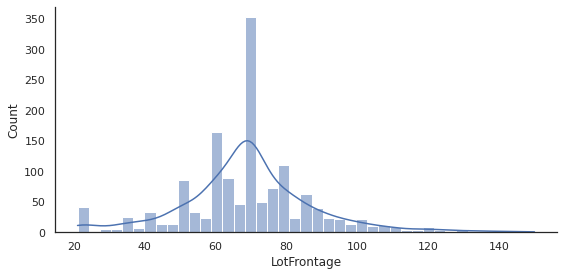

In [ ]:
sns.displot(data=train['LotFrontage'], kde=True, height=4, aspect=2)

**LotArea**

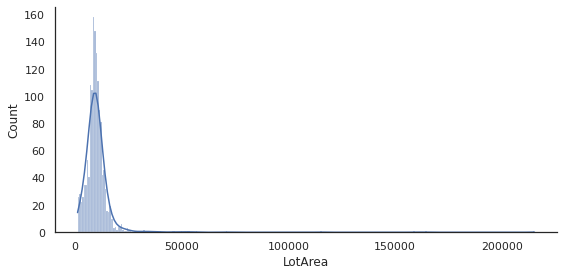

In [ ]:
sns.displot(data=train['LotArea'], kde=True, height=4, aspect=2)

In [ ]:
q = train['LotArea'].quantile(0.99)
print('Cut-Off at: '+str(q))

Cut-Off at: 34925.30999999997


In [ ]:
ds = train['LotArea']>q
print('Rows deleted: '+str(ds.sum()))
train = train[train['LotArea']<q]

Rows deleted: 15


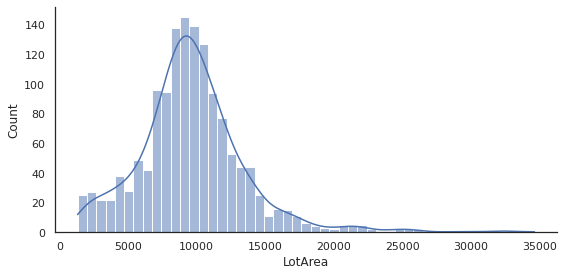

In [ ]:
sns.displot(data=train['LotArea'], kde=True, height=4, aspect=2)

**TotalBsmtSF**

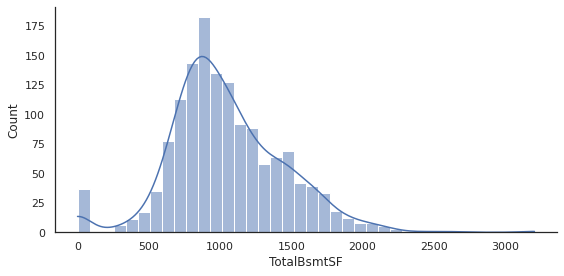

In [ ]:
sns.displot(data=train['TotalBsmtSF'], kde=True, height=4, aspect=2)

In [ ]:
q = train['TotalBsmtSF'].quantile(0.99)
print('Cut-Off at: '+str(q))

Cut-Off at: 2077.7200000000003


In [ ]:
ds = train['TotalBsmtSF']>q
print('Rows deleted: '+str(ds.sum()))
train = train[train['TotalBsmtSF']<q]

Rows deleted: 15


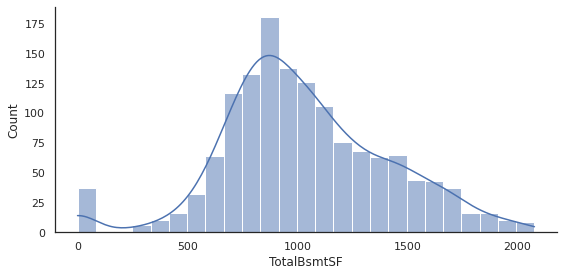

In [ ]:
sns.displot(data=train['TotalBsmtSF'], kde=True, height=4, aspect=2)

**1stFlrSF**

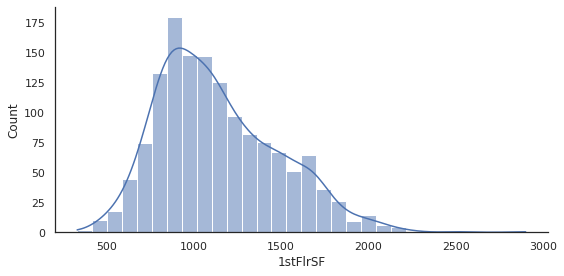

In [ ]:
sns.displot(data=train['1stFlrSF'], kde=True, height=4, aspect=2)

In [ ]:
q = train['1stFlrSF'].quantile(0.995)
print('Cut-Off at: '+str(q))

Cut-Off at: 2115.699999999999


In [ ]:
ds = train['1stFlrSF']>q
print('Rows deleted: '+str(ds.sum()))
train = train[train['1stFlrSF']<q]

Rows deleted: 8


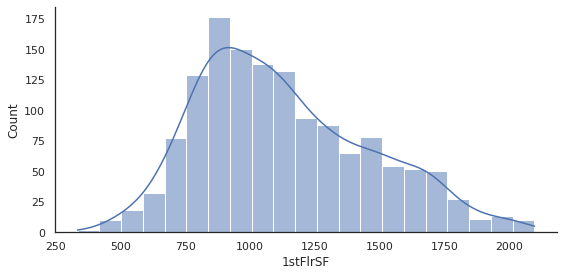

In [ ]:
sns.displot(data=train['1stFlrSF'], kde=True, height=4, aspect=2)

**GarageArea**

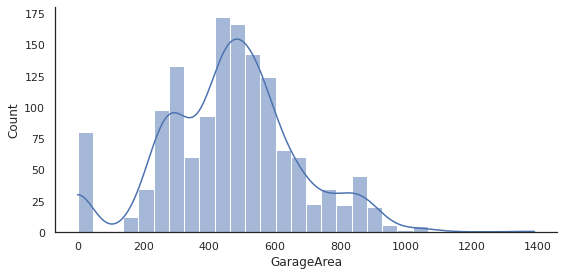

In [ ]:
sns.displot(data=train['GarageArea'], kde=True, height=4, aspect=2)

In [ ]:
q = train['GarageArea'].quantile(0.997)
print('Cut-Off at: '+str(q))

Cut-Off at: 1065.5600000000013


In [ ]:
ds = train['GarageArea']>q
print('Rows deleted: '+str(ds.sum()))
train = train[train['GarageArea']<q]

Rows deleted: 5


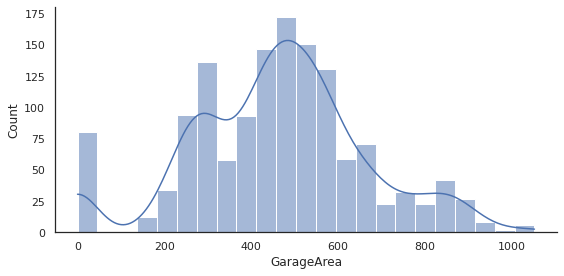

In [ ]:
sns.displot(data=train['GarageArea'], kde=True, height=4, aspect=2)

**GrLivArea**

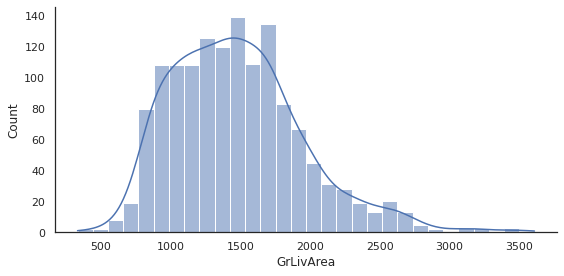

In [ ]:
sns.displot(data=train['GrLivArea'], kde=True, height=4, aspect=2)

In [ ]:
q = train['GrLivArea'].quantile(0.995)
print('Cut-Off at: '+str(q))

Cut-Off at: 3140.0


In [ ]:
ds = train['GrLivArea']>q
print('Rows deleted: '+str(ds.sum()))
train = train[train['GrLivArea']<q]

Rows deleted: 7


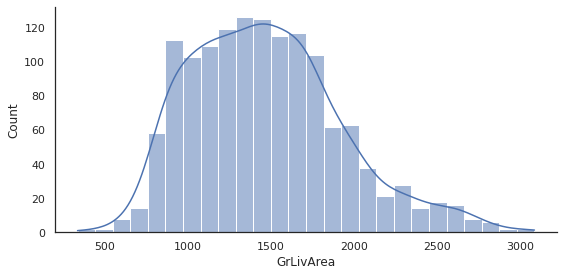

In [ ]:
sns.displot(data=train['GrLivArea'], kde=True, height=4, aspect=2)

### Convert to string

**MSSubClass**

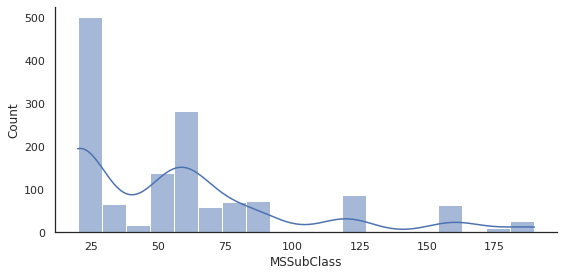

In [ ]:
sns.displot(data=train['MSSubClass'], kde=True, height=4, aspect=2)

In [ ]:
train['MSSubClass'] = train['MSSubClass'].astype(str)

**MoSold**

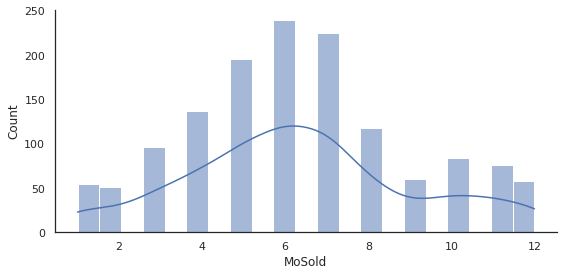

In [ ]:
sns.displot(data=train['MoSold'], kde=True, height=4, aspect=2)

In [ ]:
train['MoSold'] = train['MoSold'].astype(str)

**YrSold**

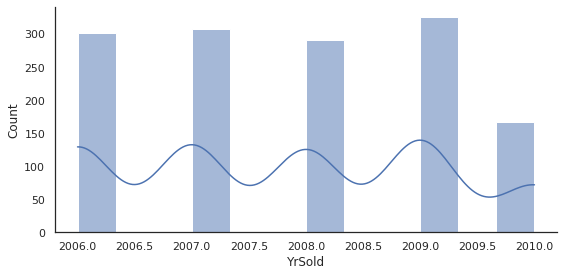

In [ ]:
sns.displot(data=train['YrSold'], kde=True, height=4, aspect=2)

In [ ]:
train['YrSold'] = train['YrSold'].astype(str)

**OverallQual**

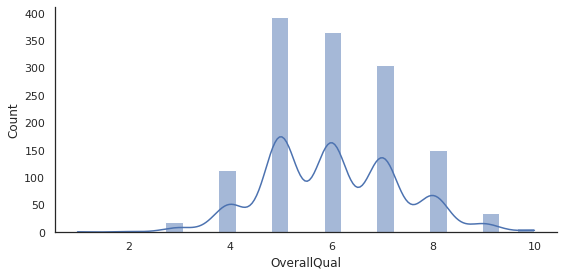

In [ ]:
sns.displot(data=train['OverallQual'], kde=True, height=4, aspect=2)

In [ ]:
train['OverallQual'] = train['OverallQual'].astype(str)

**OverallCond**

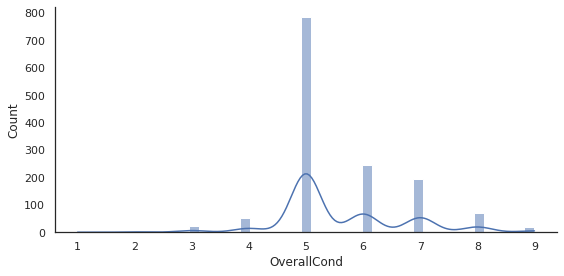

In [ ]:
sns.displot(data=train['OverallCond'], kde=True, height=4, aspect=2)

In [ ]:
train['OverallCond'] = train['OverallCond'].astype(str)

**YearBuild**

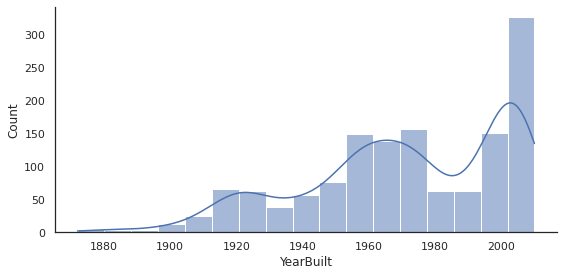

In [ ]:
sns.displot(data=train['YearBuilt'], kde=True, height=4, aspect=2)

In [ ]:
train['YearBuilt'] = train['YearBuilt'].astype(str)

**YearRemodAdd**

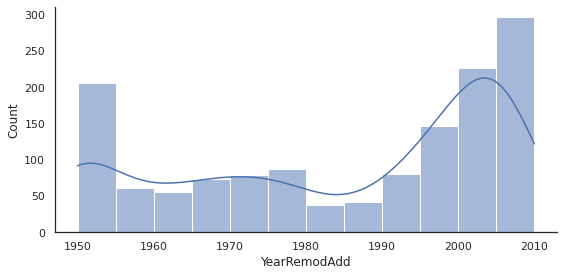

In [ ]:
sns.displot(data=train['YearRemodAdd'], kde=True, height=4, aspect=2)

In [ ]:
train['YearRemodAdd'] = train['YearRemodAdd'].astype(str)

**GarageYrBlt**



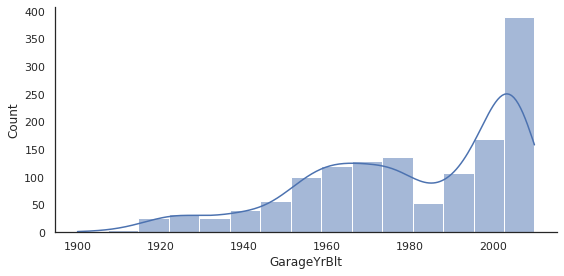

In [ ]:
sns.displot(data=train['GarageYrBlt'], kde=True, height=4, aspect=2)

In [ ]:
train['GarageYrBlt'] = train['GarageYrBlt'].astype(str)

### Dropping columns

**MasVnrArea**

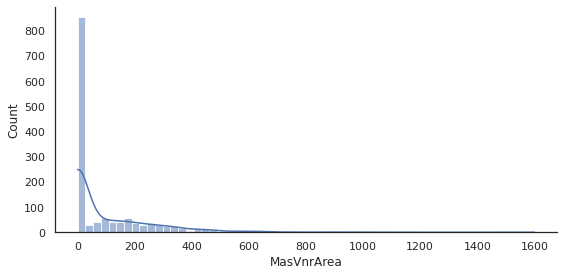

In [ ]:
sns.displot(data=train['MasVnrArea'], kde=True, height=4, aspect=2)

In [ ]:
# Delete entire column, too many 0 values ...
train = train.drop('MasVnrArea', axis=1)

**BsmtFinSF1**

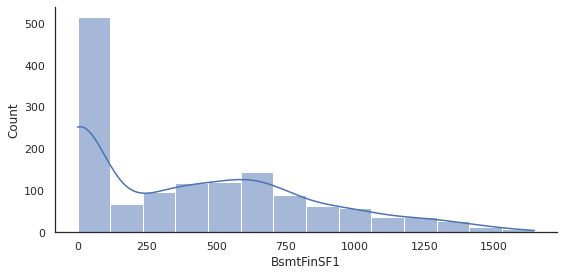

In [ ]:
sns.displot(data=train['BsmtFinSF1'], kde=True, height=4, aspect=2)

In [ ]:
# Delete entire column, too many 0 values ...
train = train.drop('BsmtFinSF1', axis=1)

**BsmtFinSF2**

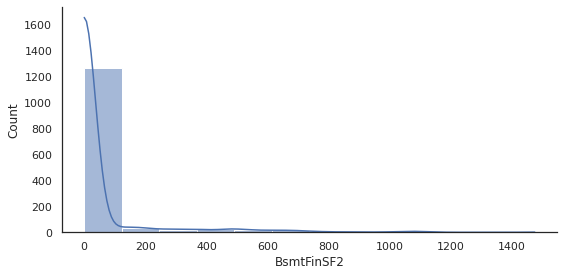

In [ ]:
sns.displot(data=train['BsmtFinSF2'], kde=True, height=4, aspect=2)

In [ ]:
# Delete entire column, too many 0 values ...
train = train.drop('BsmtFinSF2', axis=1)

**2ndFlrSF**

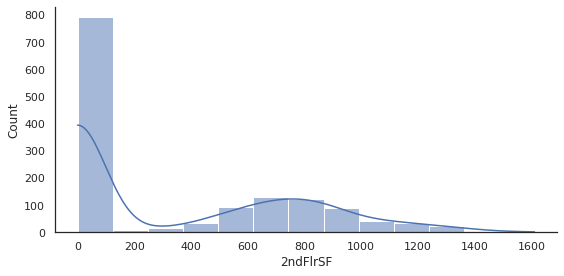

In [ ]:
sns.displot(data=train['2ndFlrSF'], kde=True, height=4, aspect=2)

In [ ]:
# Delete entire column, too many 0 values ...
train = train.drop('2ndFlrSF', axis=1)

**LowQualFinSF**

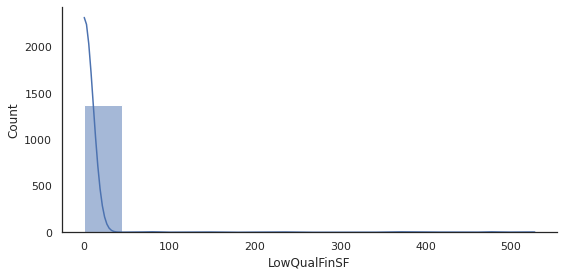

In [ ]:
sns.displot(data=train['LowQualFinSF'], kde=True, height=4, aspect=2)

In [ ]:
# Delete entire column, too many 0 values ...
train = train.drop('LowQualFinSF', axis=1)

**WoodDeckSF**

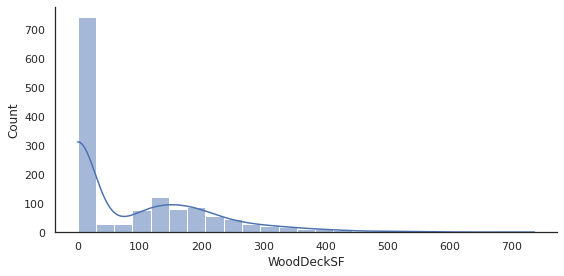

In [ ]:
sns.displot(data=train['WoodDeckSF'], kde=True, height=4, aspect=2)

In [ ]:
# Delete entire column, too many 0 values ...
train = train.drop('WoodDeckSF', axis=1)

**OpenPorchSF**

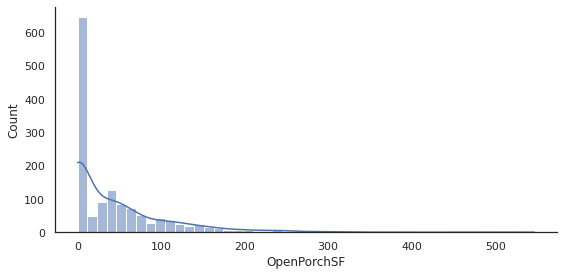

In [ ]:
sns.displot(data=train['OpenPorchSF'], kde=True, height=4, aspect=2)

In [ ]:
# Delete entire column, too many 0 values ...
train = train.drop('OpenPorchSF', axis=1)

**EnclosedPorch**

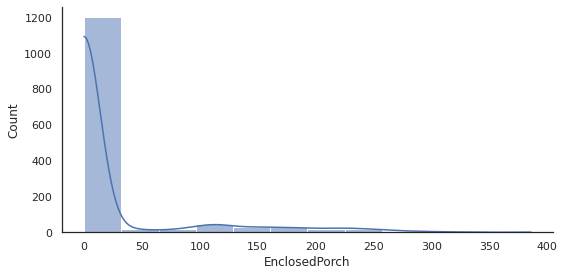

In [ ]:
sns.displot(data=train['EnclosedPorch'], kde=True, height=4, aspect=2)

In [ ]:
# Delete entire column, too many 0 values ...
train = train.drop('EnclosedPorch', axis=1)

**3SsnPorch**

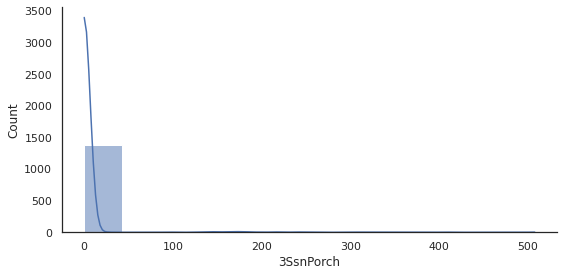

In [ ]:
sns.displot(data=train['3SsnPorch'], kde=True, height=4, aspect=2)

In [ ]:
# Delete entire column, too many 0 values ...
train = train.drop('3SsnPorch', axis=1)

**ScreenPorch**

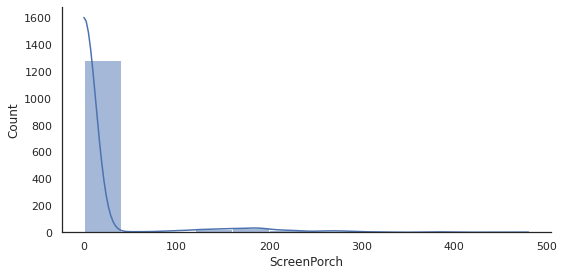

In [ ]:
sns.displot(data=train['ScreenPorch'], kde=True, height=4, aspect=2)

In [ ]:
# Delete entire column, too many 0 values ...
train = train.drop('ScreenPorch', axis=1)

**PoolArea**

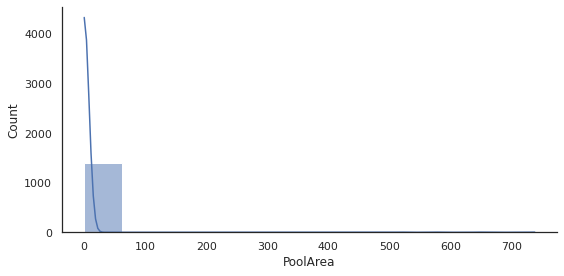

In [ ]:
sns.displot(data=train['PoolArea'], kde=True, height=4, aspect=2)

In [ ]:
# Delete entire column, too many 0 values ...
train = train.drop('PoolArea', axis=1)

**MiscVal**

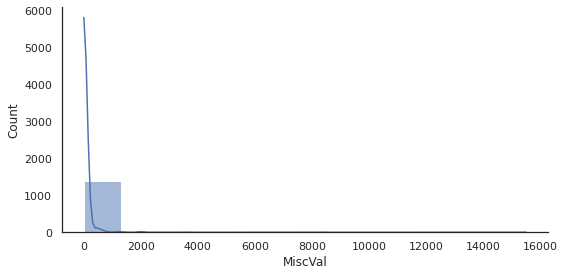

In [ ]:
sns.displot(data=train['MiscVal'], kde=True, height=4, aspect=2)

In [ ]:
# Delete entire column, too many 0 values ...
train = train.drop('MiscVal', axis=1)

## Log Transformation (To be continued)

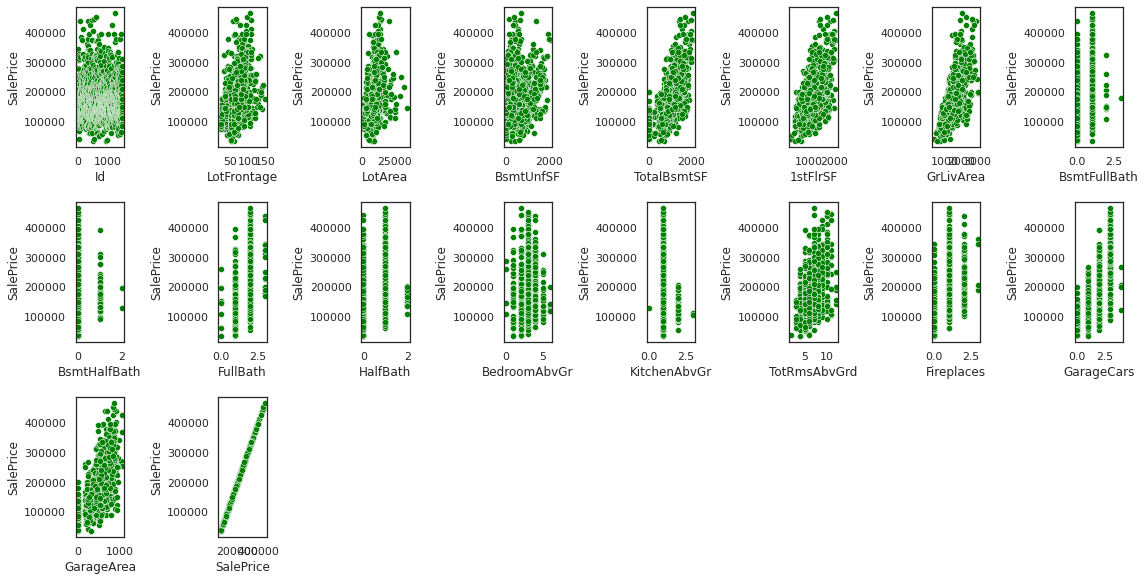

In [ ]:
fig = plt.figure(figsize=(16,16))
for ind,col in enumerate(train.select_dtypes(exclude='object')):
    plt.subplot(6,8,ind+1);
    sns.scatterplot(x=train.select_dtypes(exclude='object').loc[:,col],y='SalePrice',data=train.select_dtypes(exclude='object').dropna(), color='green');

fig.tight_layout(pad=1.5);

## There are many variables to apply log transformation ...

In [ ]:
# # Categorical Variables distribution / Checking frequency
# fig = plt.figure(figsize=(20,18))

# for ind,col in enumerate(train.select_dtypes(exclude='object')):
#     plt.subplot(9,8,ind+1);
#     sns.countplot(x=train.loc[:,col],data=train.select_dtypes(exclude='object'));

# fig.tight_layout(pad=1.5);

# # It is important that the categorical features have a high count and variance 
# drop_cat = ['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentrailAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
# keep_cat = [col for col in cat_features if col not in drop_cat]

## Preprocessing Test Data Set

All preprocessing steps on the training set have to be applied on the test set

In [ ]:
# Checking for missing numerical values
missing_count_num = test.select_dtypes(exclude='object').isna().sum()/len(test)*100
missing_count_num = missing_count_num[missing_count_num > 0]
missing_count_num.sort_values()

BsmtFinSF1       0.068540
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
GarageCars       0.068540
GarageArea       0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
MasVnrArea       1.028101
GarageYrBlt      5.346127
LotFrontage     15.558602
dtype: float64

In [ ]:
# Imputing nan in numerical columns
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(abs(test['BsmtFinSF1'].median()))
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(abs(test['BsmtFinSF2'].median()))
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(abs(test['BsmtUnfSF'].mean()))
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(abs(test['TotalBsmtSF'].median()))
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mode()[0]) 
test['GarageArea'] = test['GarageArea'].fillna(abs(test['GarageArea'].median()))
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0])
test['MasVnrArea'] = test['MasVnrArea'].fillna(abs(test['MasVnrArea'].median()))
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mode()[0])
test['LotFrontage'] = test['LotFrontage'].fillna(abs(test['LotFrontage'].median()))
test.select_dtypes(exclude='object').isna().sum().sum()

0

In [ ]:
#Checking for missing categorical values
missing_count_cat = test.select_dtypes(include='object').isna().sum()/len(test)*100
missing_count_cat = missing_count_cat[missing_count_cat > 0]
missing_count_cat.sort_values()

SaleType         0.068540
Exterior1st      0.068540
Exterior2nd      0.068540
KitchenQual      0.068540
Functional       0.137080
Utilities        0.137080
MSZoning         0.274160
MasVnrType       1.096642
BsmtFinType1     2.878684
BsmtFinType2     2.878684
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtCond         3.084304
GarageType       5.209047
GarageFinish     5.346127
GarageQual       5.346127
GarageCond       5.346127
FireplaceQu     50.034270
Fence           80.123372
Alley           92.666210
MiscFeature     96.504455
PoolQC          99.794380
dtype: float64

In [ ]:
# Imputing nan in categorical columns
test['PoolQC'] = test['PoolQC'].fillna('No Pool')
test['MiscFeature'] = test['MiscFeature'].fillna('No miscellaneous features')
test['Alley'] = test['Alley'].fillna('No alley access')
test['Fence'] = test['Fence'].fillna('No fence')
test['FireplaceQu'] = test['FireplaceQu'].fillna('No fireplace')

test['GarageCond'] = test['GarageCond'].fillna('No garage')
test['GarageQual'] = test['GarageQual'].fillna('No garage')
test['GarageFinish'] = test['GarageFinish'].fillna('No garage')
test['GarageType'] = test['GarageType'].fillna('No garage')

test['BsmtFinType2'] = test['BsmtFinType2'].fillna('No basement')
test['BsmtExposure'] = test['BsmtExposure'].fillna('No basement')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('No basement')
test['BsmtCond'] = test['BsmtCond'].fillna('No basement')
test['BsmtQual'] = test['BsmtQual'].fillna('No basement')

test['MasVnrType'] = test['MasVnrType'].fillna('None')
test['Electrical'] = test['Electrical'].fillna(test['Electrical'].mode()[0])
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])
test['Utilities'] = test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Functional'] = test['Functional'].fillna(test['Functional'].mode()[0])
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])

test.select_dtypes(include='object').isna().sum().sum()

0

In [ ]:
# Drop irrelevant numerical variables (based on previous analysis)
test = test.drop(['Id', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1)


In [ ]:
# Typecasting variables the right way
test[['BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']] = test[['BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']].astype('int64')
test[['MSSubClass', 'MoSold', 'YrSold', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']] = test[['MSSubClass', 'MoSold', 'YrSold', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].astype(str)

# Linear Regression Model

In [ ]:
# Declare dependant and independant variables of training set
targets = train['SalePrice']
training_inputs = train.drop(['SalePrice', 'Id'], axis=1)
training_inputs.shape

(1393, 67)

In [ ]:
# Declare dependant and independant variables of test set
test_inputs = test
test_inputs.shape

(1459, 67)

In [ ]:
# Since there are certain unique values in the set, that are not in the train set, we have to 
# concatenate both sets, generate dummy variables and then split them again.
train_objs_num = len(train)
dataset = pd.concat(objs=[training_inputs, test_inputs], axis=0)
dataset_dummies = pd.get_dummies(dataset)
train_inputs_dummies = dataset_dummies[:train_objs_num]
test_inputs_dummies = dataset_dummies[train_objs_num:]

In [ ]:
train_inputs_dummies.shape

(1393, 614)

In [ ]:
test_inputs_dummies.shape

(1459, 614)

## Training the model

In [ ]:
# Standardize features by removing the mean and scaling to unit variance.
# Scaling has no effect on the predictive power of dummy variables, but they will lose their meaning
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_inputs_dummies)
training_inputs_scaled = scaler.transform(train_inputs_dummies)

StandardScaler()

In [ ]:
# Split Training and Test set with 80/20 ratio
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(training_inputs_scaled, targets, test_size=0.2, random_state=21)

In [ ]:
# Create xgb regressor object
xgb = xgb.XGBRegressor(subsample=0.1,
                      n_estimators=700,
                      min_child_weight= 2,
                      max_depth=4,
                      learning_rate=0.2,
                      col_sample_bytree=1,
                      booster='gblinear',
                      alpha=22)

# Fit the regression
xgb.fit(x_train,y_train)

[20:03:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=22, booster='gblinear', col_sample_bytree=1,
             learning_rate=0.2, max_depth=4, min_child_weight=2,
             n_estimators=700, subsample=0.1)

## Standardize values from test set

In [ ]:
# Standardize features by removing the mean and scaling to unit variance.
# Scaling has no effect on the predictive power of dummy variables, but they will lose their meaning
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(test_inputs_dummies)
test_inputs_scaled = scaler.transform(test_inputs_dummies)

StandardScaler()

# Model Accuracy

## Standard deviation of residuals / Root mean square error

In [ ]:
y_train_pred = xgb.predict(x_train)
y_test_pred = xgb.predict(x_test)
y_train_pred_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred)) #RMSE of saleprice real and predicted values in training set
y_test_pred_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred)) #RMSE of saleprice real and predicted values in test set
print('Train RMSE: '+str(int(y_train_pred_rmse)))
print('Test RMSE: '+str(int(y_test_pred_rmse)))

Train RMSE: 18501
Test RMSE: 21971


## R-squared

In [ ]:
print('Train R-squared: '+str(round(xgb.score(x_train, y_train), 3)))
print('Test R-squared: '+str(round(xgb.score(x_test, y_test), 3)))

Train R-squared: 0.925
Test R-squared: 0.888


## Adjusted R-squared

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [ ]:
# R-squared
r2_train = xgb.score(x_train, y_train)
r2_test = xgb.score(x_train, y_train)

# Number of observations
n_train = x_train.shape[0]
n_test = x_test.shape[0]

# Number of features
p_train = 67
p_test = 67

print('Train adjusted R-squared: '+str(round(1-(1-r2_train)*(n_train-1)/(n_train-p_train-1), 3)))
print('Test adjusted R-squared: '+str(round(1-(1-r2_test)*(n_test-1)/(n_test-p_test-1), 3)))

Train adjusted R-squared: 0.92
Test adjusted R-squared: 0.901


## Scatter plot

Text(0.5, 0, 'Targets (y_test)')

Text(0, 0.5, 'Predictions (y_test_pred)')

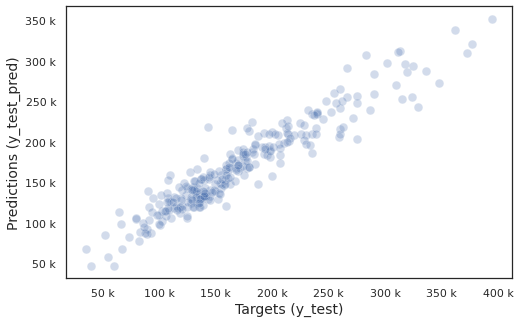

In [ ]:
# Scatter plot with the test targets and test predictions
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(ax=ax, x=y_test, y=y_test_pred, alpha=0.25, s=75)
ax.xaxis.set_major_formatter(ticker.EngFormatter())
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.xlabel('Targets (y_test)',size=14)
plt.ylabel('Predictions (y_test_pred)',size=14)
plt.show()

In [ ]:
# Compare Predictions with targets, Error and %Difference in tabular form

## Predict targets for actual test set

In [ ]:
pred = xgb.predict(test_inputs_scaled)

In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/Elnisa/nisa/main/test.csv')
test['SalePrice'] = pred
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,114571.367188
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,150722.375000
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,185903.703125
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,202441.828125
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,177700.156250
